<a href="https://colab.research.google.com/github/MaameAgyemang/testWebApp/blob/main/Copy_of_Project_2_Maame_and_Novleen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest MSE: 17.73607715127259
Support Vector Regressor MSE: 18.086322154761113


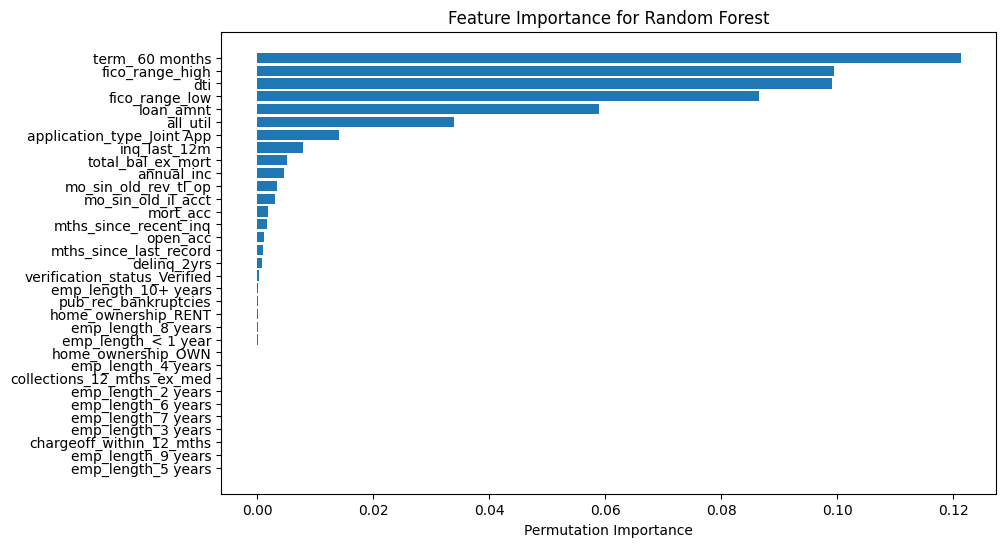

100%|===================| 19925/20000 [04:30<00:01]       

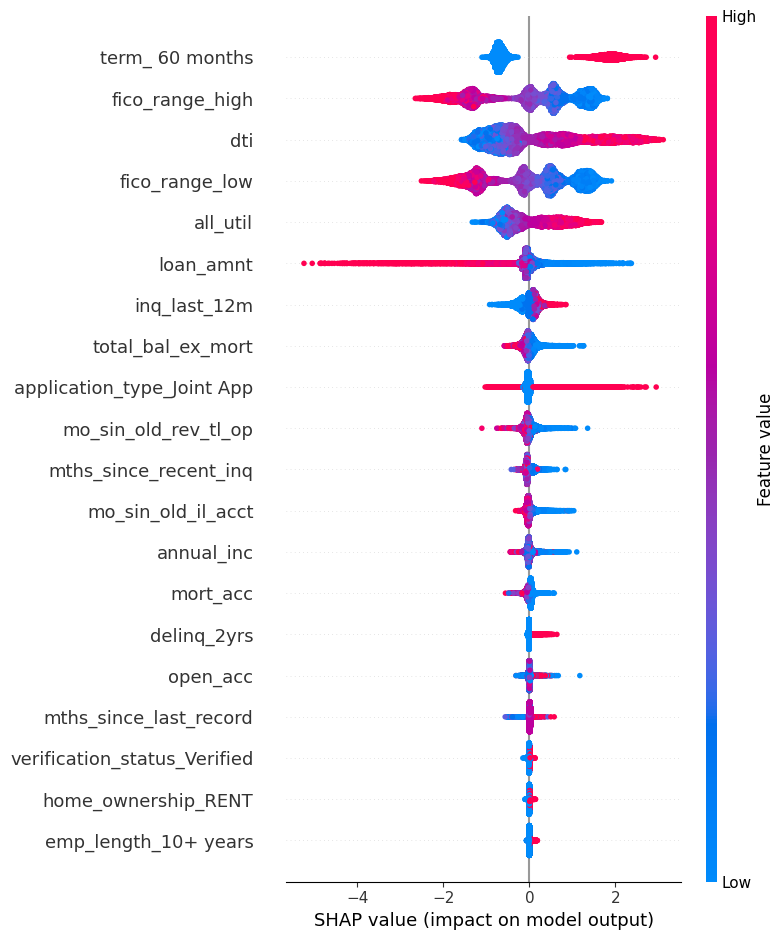

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
!pip install shap
import shap # Import the shap module

# Load the dataset with the updated file path
file_path = '/content/LC_HW2 (1).csv'  # Changed file path
df = pd.read_csv(file_path)

# Data Preprocessing
df = df.dropna(subset=['int_rate'])  # Drop rows with missing target values

# Select only numeric columns for median imputation
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  # Fill remaining missing values with the median for numeric columns only

df = pd.get_dummies(df, drop_first=True)  # Convert categorical variables to numerical using one-hot encoding

# Splitting data into features and target variable
X = df.drop('int_rate', axis=1)
y = df['int_rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Comparison
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_pred)

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_pred)

print(f"Random Forest MSE: {rf_mse}")
print(f"Support Vector Regressor MSE: {svr_mse}")

# Model Explainability
# Permutation Importance
perm_importance = permutation_importance(rf_model, X_test_scaled, y_test)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for Random Forest")
plt.show()

# SHAP values with additivity check disabled
explainer = shap.Explainer(rf_model, X_train_scaled)
shap_values = explainer(X_test_scaled, check_additivity=False)  # This is the key change

shap.initjs()
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
plt.show()